Exercises
 Dataset: Use the Iris dataset from Day 3 or a sampled subset.


In [19]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
from statsmodels.formula.api import ols

In [20]:
# Step 1: Load the Iris dataset
iris_data = sns.load_dataset('iris')
print("First 5 rows of the dataset:\n", iris_data.head())

First 5 rows of the dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [21]:
# Step 2: Divide the dataset by species
setosa_data = iris_data[iris_data['species'] == 'setosa']
virginica_data = iris_data[iris_data['species'] == 'virginica']
versicolor_data = iris_data[iris_data['species'] == 'versicolor']

In [22]:
# Step 3: Perform T-Test (Setosa vs Versicolor - Petal Length)
print("\nT-Test: Comparing petal lengths of Setosa and Versicolor")
t_statistic, t_p_value = ttest_ind(setosa_data['petal_length'], versicolor_data['petal_length'])
print(f"T-Statistic: {t_statistic:.3f}")
print(f"P-Value: {t_p_value:.3f}")
if t_p_value < 0.05:
    print("Result: Null hypothesis rejected - Significant difference in means.")
else:
    print("Result: Failed to reject Null hypothesis - Means are similar.")


T-Test: Comparing petal lengths of Setosa and Versicolor
T-Statistic: -39.493
P-Value: 0.000
Result: Null hypothesis rejected - Significant difference in means.


In [23]:
# Step 4: Perform Z-Test (Mean Sepal Length vs Given Value)
given_mean = 5.0
population_sd = 0.5  # Assumed population standard deviation
sample_mean = iris_data['sepal_length'].mean()
sample_size = len(iris_data['sepal_length'])
z_statistic = (sample_mean - given_mean) / (population_sd / np.sqrt(sample_size))
print("\nZ-Test: Checking if the mean sepal length equals 5.0")
print(f"Z-Statistic: {z_statistic:.3f}")


Z-Test: Checking if the mean sepal length equals 5.0
Z-Statistic: 20.657


In [24]:

# Step 5: Perform ANOVA (Compare petal widths across species)
print("\nANOVA: Comparing petal widths across all species")
anova_f_stat, anova_p_value = f_oneway(
    setosa_data['petal_width'], versicolor_data['petal_width'], virginica_data['petal_width']
)
print(f"F-Statistic: {anova_f_stat:.3f}")
print(f"P-Value: {anova_p_value:.3f}")
if anova_p_value < 0.05:
    print("Result: Null hypothesis rejected - Significant differences exist.")
else:
    print("Result: Failed to reject Null hypothesis - Means are similar.")


ANOVA: Comparing petal widths across all species
F-Statistic: 960.007
P-Value: 0.000
Result: Null hypothesis rejected - Significant differences exist.


In [25]:
# Step 6: Correlation between Sepal Length and Petal Length
print("\nCorrelation: Sepal Length vs Petal Length")
correlation_coefficient = iris_data['sepal_length'].corr(iris_data['petal_length'])
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")


Correlation: Sepal Length vs Petal Length
Correlation Coefficient: 0.872


In [26]:
# Step 7: Regression Analysis (Sepal Length -> Petal Length)
print("\nRegression Analysis: Sepal Length as predictor for Petal Length")
regression_model = ols('petal_length ~ sepal_length', data=iris_data).fit()
print(regression_model.summary())


Regression Analysis: Sepal Length as predictor for Petal Length
                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.04e-47
Time:                        23:47:10   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

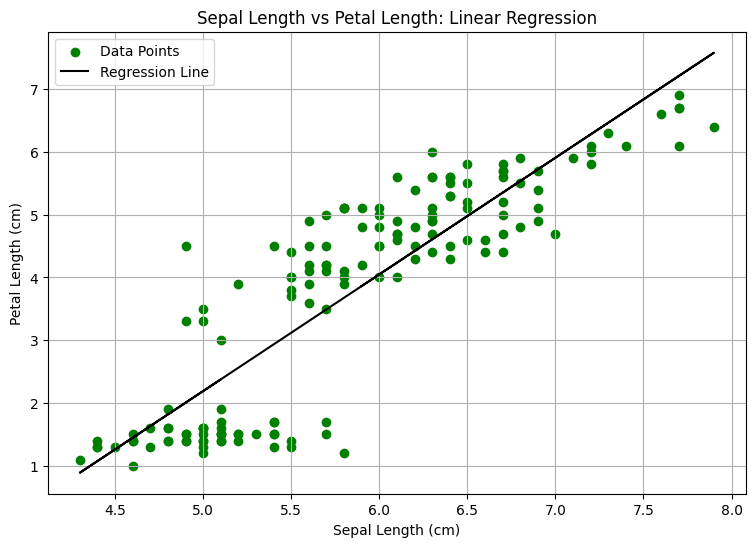

In [27]:
# Step 8: Plotting the Regression Results
plt.figure(figsize=(9, 6))
plt.scatter(iris_data['sepal_length'], iris_data['petal_length'], color='green', label='Data Points')
plt.plot(iris_data['sepal_length'], regression_model.predict(), color='black', label='Regression Line')
plt.title('Sepal Length vs Petal Length: Linear Regression')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid()
plt.show()